In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [5]:
adult = pd.read_csv('/home/raghav/Desktop/introduction to machine learning/adults.csv')
X = adult.iloc[:,[0,2,4,10,11,12]]
y = adult.iloc[:,14]
adult


,age,workclass,fnwlgt,education,education num,Marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native-country,income
0,17,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,39,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,50,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,38,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,53,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,28,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,37,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,49,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,52,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,31,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


/usr/lib/python3/dist-packages/matplotlib/__init__.py:900: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


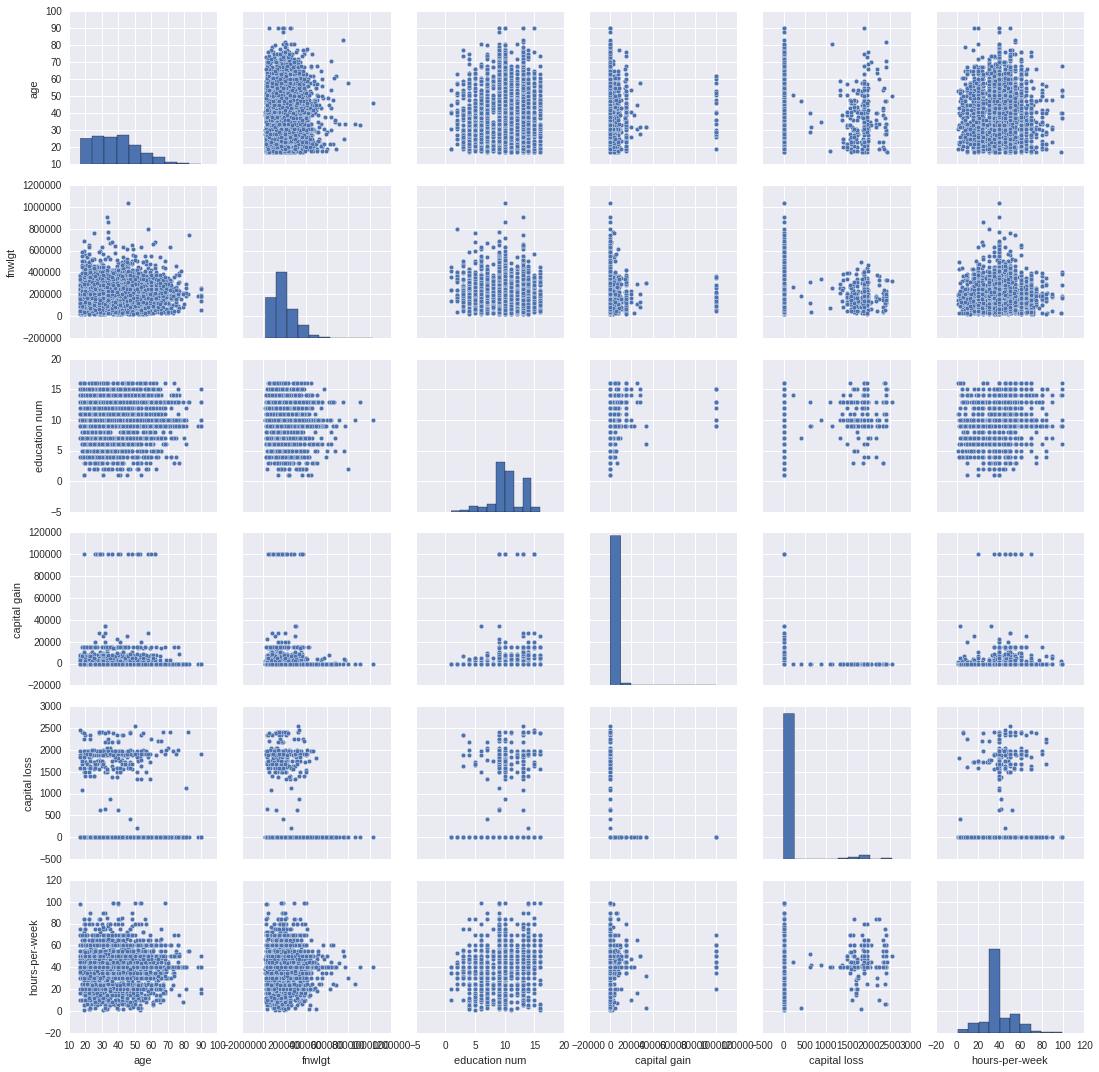

In [6]:
sb.pairplot(X)
plt.show()

In [3]:
from sklearn.neural_network import MLPClassifier as M
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split

/home/raghav/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.1)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(y_train)
y_train = lb.transform(y_train)
lb.fit(y_test)
y_test = lb.transform(y_test)


In [7]:
from sklearn.neural_network import MLPClassifier as M
import time
start_time = time.time()
mlp = M(hidden_layer_sizes=(192,512,128),random_state=42,tol=0.001,activation='tanh',verbose=10,learning_rate='adaptive')
mlp.fit(X_train_std,y_train)

Iteration 1, loss = 0.46481119
Iteration 2, loss = 0.44090104
Iteration 3, loss = 0.43559652
Iteration 4, loss = 0.43250501
Iteration 5, loss = 0.42977375
Iteration 6, loss = 0.43311835
Iteration 7, loss = 0.43321675
Iteration 8, loss = 0.42714038
Iteration 9, loss = 0.42738839
Iteration 10, loss = 0.42599748
Iteration 11, loss = 0.42176464
Iteration 12, loss = 0.42256473
Iteration 13, loss = 0.42295324
Iteration 14, loss = 0.42296999
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(192, 512, 128), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [8]:
mlp.score(X_train_std,y_train)

0.81711372201285748

In [10]:
from sklearn.neural_network import MLPClassifier as M
import time
start_time = time.time()
mlp = M(hidden_layer_sizes=(192,512,128),random_state=42,tol=0.001,activation='identity',verbose=10,learning_rate='adaptive')
mlp.fit(X_train_std,y_train)

Iteration 1, loss = 0.46638110
Iteration 2, loss = 0.44586744
Iteration 3, loss = 0.44075352
Iteration 4, loss = 0.44085204
Iteration 5, loss = 0.44043994
Iteration 6, loss = 0.43872427
Iteration 7, loss = 0.44224055
Iteration 8, loss = 0.43996676
Iteration 9, loss = 0.44078971
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(192, 512, 128), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [11]:
mlp.score(X_train_std,y_train)

0.80802482819773891

In [12]:
from sklearn.neural_network import MLPClassifier as M
import time
start_time = time.time()
mlp = M(hidden_layer_sizes=(192,512,128),random_state=42,tol=0.001,activation='relu',verbose=10,learning_rate='adaptive')
mlp.fit(X_train_std,y_train)

Iteration 1, loss = 0.47757514
Iteration 2, loss = 0.43508139
Iteration 3, loss = 0.42896461
Iteration 4, loss = 0.42436003
Iteration 5, loss = 0.42280481
Iteration 6, loss = 0.42444765
Iteration 7, loss = 0.42334971
Iteration 8, loss = 0.41745041
Iteration 9, loss = 0.41851829
Iteration 10, loss = 0.41665585
Iteration 11, loss = 0.41231878
Iteration 12, loss = 0.41397657
Iteration 13, loss = 0.41277719
Iteration 14, loss = 0.40956240
Iteration 15, loss = 0.40894981
Iteration 16, loss = 0.40459412
Iteration 17, loss = 0.40441706
Iteration 18, loss = 0.40469728
Iteration 19, loss = 0.40171812
Iteration 20, loss = 0.40391439
Iteration 21, loss = 0.40012927
Iteration 22, loss = 0.40039848
Iteration 23, loss = 0.39920005
Iteration 24, loss = 0.39494806
Iteration 25, loss = 0.39165498
Iteration 26, loss = 0.39045929
Iteration 27, loss = 0.38684970
Iteration 28, loss = 0.38736964
Iteration 29, loss = 0.38521571
Iteration 30, loss = 0.38233755
Iteration 31, loss = 0.38667427
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(192, 512, 128), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [1]:
mlp.score(X_test_std,y_test)

NameError: name 'mlp' is not defined